# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from pandas.api.types import is_numeric_dtype

# Import API key
from config import api_key

# Incorporated citipy and openweathermap
from citipy import citipy
import openweathermapy.core as owm

# Output File (CSV)
output = "./output_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Prepare search settings
settings = {"units": "imperial", "appid":api_key}

# Store data in dict
weather = {}

# Loop through list of cities and pull current weather data
for num in range( len(cities) ):
    city = cities[num]
    try:
        owm.get_current( cities[num], **settings)
    except:
        print( f"{city} not found. Skipping... ")
    else:
        current = owm.get_current( cities[num], **settings )
        weather[city] = current
        print( f"Processing Record {num + 1} | {cities[num]}" )

Processing Record 1 | ilulissat
illoqqortoormiut not found. Skipping... 
Processing Record 3 | rikitea
Processing Record 4 | calarasi
Processing Record 5 | jamestown
Processing Record 6 | ambulu
Processing Record 7 | saint-francois
Processing Record 8 | provideniya
Processing Record 9 | hobart
bengkulu not found. Skipping... 
Processing Record 11 | busselton
Processing Record 12 | punta arenas
Processing Record 13 | russell
Processing Record 14 | arraial do cabo
Processing Record 15 | avera
Processing Record 16 | coahuayana
Processing Record 17 | galveston
Processing Record 18 | sioux lookout
Processing Record 19 | baculin
Processing Record 20 | sitka
Processing Record 21 | bilma
Processing Record 22 | port augusta
Processing Record 23 | takoradi
Processing Record 24 | bambous virieux
Processing Record 25 | sungaipenuh
louisbourg not found. Skipping... 
Processing Record 27 | georgetown
Processing Record 28 | russellville
Processing Record 29 | saldanha
Processing Record 30 | halifax
P

Processing Record 249 | tarakan
Processing Record 250 | seoul
Processing Record 251 | japura
Processing Record 252 | mocuba
Processing Record 253 | urengoy
Processing Record 254 | hami
Processing Record 255 | ekhabi
Processing Record 256 | tateyama
Processing Record 257 | ende
Processing Record 258 | esperance
Processing Record 259 | portel
Processing Record 260 | chumphon
Processing Record 261 | ribeira grande
utiroa not found. Skipping... 
Processing Record 263 | west odessa
Processing Record 264 | bichena
Processing Record 265 | evensk
Processing Record 266 | eyl
Processing Record 267 | cooma
Processing Record 268 | sorong
vaitupu not found. Skipping... 
Processing Record 270 | kulhudhuffushi
Processing Record 271 | greenville
Processing Record 272 | coquimbo
Processing Record 273 | labuhan
Processing Record 274 | guerrero negro
Processing Record 275 | laje
maneadero not found. Skipping... 
Processing Record 277 | harvard
Processing Record 278 | san patricio
Processing Record 279 | 

Processing Record 499 | rio gallegos
Processing Record 500 | kashan
Processing Record 501 | tura
Processing Record 502 | hienghene
kismayo not found. Skipping... 
Processing Record 504 | cap-aux-meules
Processing Record 505 | diamantino
Processing Record 506 | camocim
Processing Record 507 | roma
Processing Record 508 | husavik
Processing Record 509 | viedma
Processing Record 510 | durham
Processing Record 511 | zelenoborsk
Processing Record 512 | katsuura
Processing Record 513 | yeppoon
Processing Record 514 | isangel
Processing Record 515 | mubarakpur
Processing Record 516 | emerald
Processing Record 517 | sandwick
Processing Record 518 | muros
Processing Record 519 | otatitlan
Processing Record 520 | monte patria
Processing Record 521 | mandali
Processing Record 522 | barra do garcas
samalaeulu not found. Skipping... 
Processing Record 524 | abu kamal
Processing Record 525 | clearlake
Processing Record 526 | blagoveshchenka
Processing Record 527 | port pirie
Processing Record 528 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Read data and reshape as DataFrame
data = pd.DataFrame( weather )
df = data.T
df= df.reset_index()

In [5]:
# Select columns to develop
df_weather = df[['name', 'clouds', 'sys', 'dt', 'main', 'coord', 'wind']]
df_weather = df_weather.rename( columns={'main': 'Humidity', 'coord': 'Lat'} )
df_weather['Lng'] = df['coord']
df_weather['Max Temp'] = df['main']

In [6]:
# Re-format columns
for index,row in df_weather.iterrows():
    row['clouds'] = row['clouds']['all']
    row['sys'] = row['sys']['country']
    row['Humidity'] = row['Humidity']['humidity']
    row['Lat'] = row['Lat']['lat']
    row['wind'] = row['wind']['speed']
    row['Lng'] = row['Lng']['lon']
    row['Max Temp'] = row['Max Temp']['temp_max']

# Reorder and rename columns
df_weather = df_weather[['name','clouds', 'sys','dt','Humidity','Lat','Lng','Max Temp','wind']]
df_weather = df_weather.rename( columns={'name': 'City',
                           'clouds': 'Cloudiness',
                           'sys': 'Country',
                           'dt': 'Date',
                           'Humidity': 'Humidity',
                           'Lat': 'Lat',
                           'Lng': 'Lng',
                           'Max Temp': 'Max Temp',
                           'wind': 'Wind Speed'})

In [7]:
df_weather.count()

City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Lat           537
Lng           537
Max Temp      537
Wind Speed    537
dtype: int64

In [8]:
# Display top of DataFrame
df_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ilulissat,75,GL,1551743400,78,69.22,-51.1,12.2,4.7
1,Rikitea,20,PF,1551745064,96,-23.12,-134.97,81.71,14
2,Calarasi,0,RO,1551745220,38,44.2,27.33,45,1.99
3,Jamestown,44,AU,1551744817,100,-33.21,138.6,68.8,4.27
4,Ambulu,44,ID,1551745314,100,-8.35,113.61,79.91,5.17


In [9]:
# Save DataFrame to csv file in current directory
df_weather.to_csv( output )

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

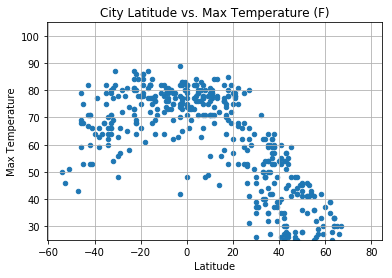

In [18]:
# Create DataFrame to build scatter plot from
lat_temp = pd.DataFrame({'Latitude': df_weather['Lat'].astype('int64'),
                        'Max Temperature': df_weather['Max Temp'].astype('int64')})

# Construct scatter plot (Lat v. Temp)
lat_temp.plot( x="Latitude",
               y="Max Temperature",
               kind="scatter",
               title="City Latitude vs. Max Temperature (F)",
               grid=True,
               ylim=(25, 105),
               xticks=range(-60,90,20),
               yticks=range(30,110,10))

# Save figure as .png
plt.savefig( "lat_temp_plot.png", bbox='tight')

#### Latitude vs. Humidity Plot

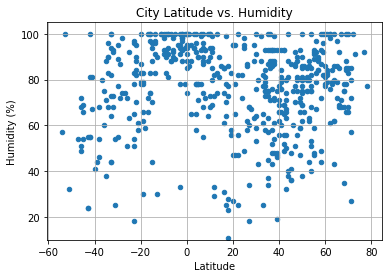

In [11]:
# Create DataFrame to build scatter plot from
lat_hum = pd.DataFrame({'Latitude': df_weather['Lat'].astype('int64'),
                        'Humidity (%)': df_weather['Humidity'].astype('int64')})

# Construct scatter plot (Lat v. Temp)
lat_hum.plot( x="Latitude",
               y="Humidity (%)",
               kind="scatter",
               title="City Latitude vs. Humidity",
               grid=True,
               ylim=(10,105),
               xticks=range(-60,90,20),
               yticks=range(20,110,20))

plt.savefig( "lat_hum_plot.png", bbox='tight')

#### Latitude vs. Cloudiness Plot

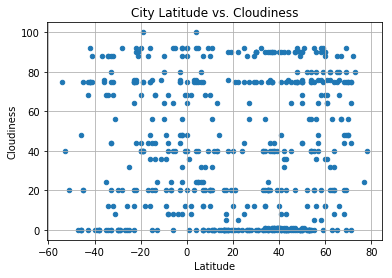

In [12]:
# Create DataFrame to build scatter plot from
lat_cloud = pd.DataFrame({'Latitude': df_weather['Lat'].astype('int64'),
                        'Cloudiness': df_weather['Cloudiness'].astype('int64')})

# Construct scatter plot (Lat v. Temp)
lat_cloud.plot( x="Latitude",
               y="Cloudiness",
               kind="scatter",
               title="City Latitude vs. Cloudiness",
               grid=True,
               ylim=(-5,105),
               xticks=range(-60,90,20),
               yticks=range(0,110,20))

plt.savefig( "lat_cloud_plot.png", bbox='tight')

#### Latitude vs. Wind Speed Plot

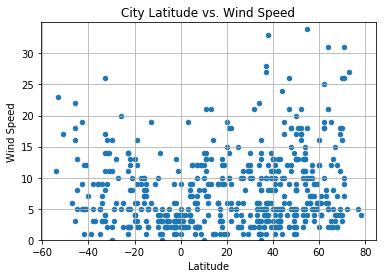

In [13]:
# Create DataFrame to build scatter plot from
lat_wind = pd.DataFrame({'Latitude': df_weather['Lat'].astype('int64'),
                        'Wind Speed': df_weather['Wind Speed'].astype('int64')})

# Construct scatter plot (Lat v. Temp)
lat_wind.plot( x="Latitude",
               y="Wind Speed",
               kind="scatter",
               title="City Latitude vs. Wind Speed",
               grid=True,
               ylim=(0,35),
               xticks=range(-60,90,20),
               yticks=range(0,35,5))

plt.savefig( "lat_wind_plot.png", bbox='tight')